# OHBM figures

Make figures for OHBM submission

In [1]:
# Import modules and R
import numpy as np, pandas as pd
from plotnine import *
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Import local code
import sys
sys.path.append('../code')
import pcaVersion
from processing_helpers import *
from analysis_helpers import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");

Attaching package: ‘lemon’



    %||%



    CoordCartesian, element_render




In [113]:
data_dir = "../data/abagen-data/expression/"
# aurina_dir = "../data/AHBAprocessing-data/processedData/HCP/parcelExpression.csv"
# hcp_aurina = pcaVersion(pd.read_csv(aurina_dir, index_col=0, header=None))
# hcp_base = pcaVersion(pd.read_csv(data_dir + 'hcp_base.csv', index_col=0))
# hcp_3donors_ds7 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds7.csv', index_col=0))
hcp_3donors_ds8 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds8.csv', index_col=0))
# hcp_3donors_ds9 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds9.csv', index_col=0))

New PCA version


## Figure 1

In [115]:
hcp_base.expression.shape

(177, 15944)

In [409]:
ahba_scores = (pd.concat({
    # 'Original': hcp_aurina.scores * -1,
    'No filters': hcp_base.scores * -1,
    'Both region & gene filters': hcp_base.score_from(hcp_3donors_ds8),
    # 'DS9': hcp_base.score_from(hcp_3donors_ds9),
})
          .groupby(level=0)
          .apply(lambda x: (x-np.mean(x))/np.std(x))
          # .iloc[:,:3]
          .reset_index(level=0).rename({'level_0':'version'},axis=1)
          # .set_axis(['version', 'PC1','PC2','PC3'],axis=1)
          .join(get_labels_hcp())
         )

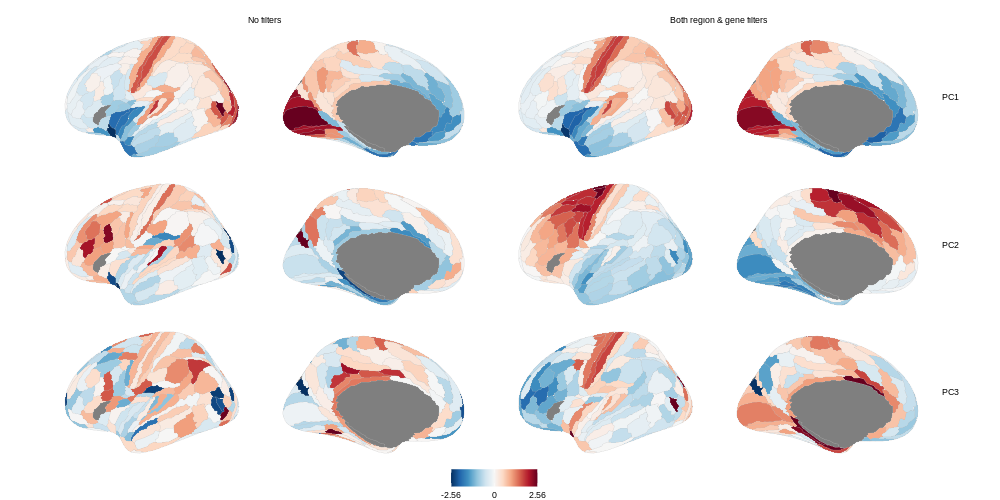

In [410]:
%%R -i ahba_scores -w 1000 -h 500
plot_hcp(ahba_scores, three=T)

Triplets

In [37]:
files = abagen.fetch_microarray(donors='all', data_dir='../data/abagen-data/microarray')
donors = list(files.keys())

In [38]:
from itertools import combinations
triplets_list = [list(x) for x in list(combinations(range(6), 3))]
triplets_names = [''.join(map(str,x)) for x in triplets_list]
triplets_dict = dict(zip(triplets_names, triplets_list))
triplets_dict_donors = {k:[donors[i] for i in v] for k,v in triplets_dict.items()}
disjoint_triplets = [list(x) for x in combinations(triplets_names,2) if not any(set(list(x[0])).intersection(set(list(x[1]))))]

Get HCP triplets with region filter but no DS filter

In [39]:
def get_triplets(**kwargs):
    hcp_triplets = {}
    for name, donors in triplets_dict_donors.items():
        expression, stability = get_expression_abagen(
            fetch_hcp(), donors=donors,
            probe_selection='diff_stability', 
            region_agg='donors',
            lr_mirror='rightleft',
            return_stability=True,
            **kwargs
        )
        hcp_triplets[name] = pcaVersion(expression, message=False)
        hcp_triplets[name].stability = stability
    return hcp_triplets

In [40]:
triplets_base = get_triplets()

15665 genes remain after filtering for top 1 differential stability
15701 genes remain after filtering for top 1 differential stability
15861 genes remain after filtering for top 1 differential stability
15926 genes remain after filtering for top 1 differential stability
15564 genes remain after filtering for top 1 differential stability
15728 genes remain after filtering for top 1 differential stability
15803 genes remain after filtering for top 1 differential stability
15755 genes remain after filtering for top 1 differential stability
15836 genes remain after filtering for top 1 differential stability
16039 genes remain after filtering for top 1 differential stability
15787 genes remain after filtering for top 1 differential stability
16027 genes remain after filtering for top 1 differential stability
16120 genes remain after filtering for top 1 differential stability
15992 genes remain after filtering for top 1 differential stability
16075 genes remain after filtering for top 1 dif

In [41]:
triplets_3donors = get_triplets(donors_threshold=3)

15665 genes remain after filtering for top 1 differential stability
15701 genes remain after filtering for top 1 differential stability
15861 genes remain after filtering for top 1 differential stability
15926 genes remain after filtering for top 1 differential stability
15564 genes remain after filtering for top 1 differential stability
15728 genes remain after filtering for top 1 differential stability
15803 genes remain after filtering for top 1 differential stability
15755 genes remain after filtering for top 1 differential stability
15836 genes remain after filtering for top 1 differential stability
16039 genes remain after filtering for top 1 differential stability
15787 genes remain after filtering for top 1 differential stability
16027 genes remain after filtering for top 1 differential stability
16120 genes remain after filtering for top 1 differential stability
15992 genes remain after filtering for top 1 differential stability
16075 genes remain after filtering for top 1 dif

In [101]:
triplets_ds7 = get_triplets(DS_threshold=0.7)

4700 genes remain after filtering for top 0.3 differential stability
4711 genes remain after filtering for top 0.3 differential stability
4759 genes remain after filtering for top 0.3 differential stability
4778 genes remain after filtering for top 0.3 differential stability
4669 genes remain after filtering for top 0.3 differential stability
4719 genes remain after filtering for top 0.3 differential stability
4741 genes remain after filtering for top 0.3 differential stability
4727 genes remain after filtering for top 0.3 differential stability
4751 genes remain after filtering for top 0.3 differential stability
4812 genes remain after filtering for top 0.3 differential stability
4736 genes remain after filtering for top 0.3 differential stability
4808 genes remain after filtering for top 0.3 differential stability
4836 genes remain after filtering for top 0.3 differential stability
4798 genes remain after filtering for top 0.3 differential stability
4823 genes remain after filtering 

In [102]:
triplets_3donors_ds7 = get_triplets(donors_threshold=3, DS_threshold=0.7)

4700 genes remain after filtering for top 0.3 differential stability
4711 genes remain after filtering for top 0.3 differential stability
4759 genes remain after filtering for top 0.3 differential stability
4778 genes remain after filtering for top 0.3 differential stability
4669 genes remain after filtering for top 0.3 differential stability
4719 genes remain after filtering for top 0.3 differential stability
4741 genes remain after filtering for top 0.3 differential stability
4727 genes remain after filtering for top 0.3 differential stability
4751 genes remain after filtering for top 0.3 differential stability
4812 genes remain after filtering for top 0.3 differential stability
4736 genes remain after filtering for top 0.3 differential stability
4808 genes remain after filtering for top 0.3 differential stability
4836 genes remain after filtering for top 0.3 differential stability
4798 genes remain after filtering for top 0.3 differential stability
4823 genes remain after filtering 

In [110]:
triplets_ds8 = get_triplets(DS_threshold=0.8)

3133 genes remain after filtering for top 0.2 differential stability
3141 genes remain after filtering for top 0.2 differential stability
3173 genes remain after filtering for top 0.2 differential stability
3186 genes remain after filtering for top 0.2 differential stability
3113 genes remain after filtering for top 0.2 differential stability
3146 genes remain after filtering for top 0.2 differential stability
3161 genes remain after filtering for top 0.2 differential stability
3151 genes remain after filtering for top 0.2 differential stability
3168 genes remain after filtering for top 0.2 differential stability
3208 genes remain after filtering for top 0.2 differential stability
3158 genes remain after filtering for top 0.2 differential stability
3206 genes remain after filtering for top 0.2 differential stability
3224 genes remain after filtering for top 0.2 differential stability
3199 genes remain after filtering for top 0.2 differential stability
3215 genes remain after filtering 

In [111]:
triplets_3donors_ds8 = get_triplets(donors_threshold=3, DS_threshold=0.8)

3133 genes remain after filtering for top 0.2 differential stability
3141 genes remain after filtering for top 0.2 differential stability
3173 genes remain after filtering for top 0.2 differential stability
3186 genes remain after filtering for top 0.2 differential stability
3113 genes remain after filtering for top 0.2 differential stability
3146 genes remain after filtering for top 0.2 differential stability
3162 genes remain after filtering for top 0.2 differential stability
3151 genes remain after filtering for top 0.2 differential stability
3168 genes remain after filtering for top 0.2 differential stability
3208 genes remain after filtering for top 0.2 differential stability
3158 genes remain after filtering for top 0.2 differential stability
3206 genes remain after filtering for top 0.2 differential stability
3224 genes remain after filtering for top 0.2 differential stability
3199 genes remain after filtering for top 0.2 differential stability
3215 genes remain after filtering 

In [97]:
# def filter_triplets_ds(triplets, ds_threshold):
#     triplets_filtered = {}
#     for name, triplet in triplets.items():
#         quantiles = np.argsort(triplet.stability)/len(triplet.stability)
#         genes_to_keep = quantiles[lambda x: x > ds_threshold].index
#         genes_to_keep = set(genes_to_keep).intersection(set(triplet.expression.columns))
#         triplets_filtered[name] = pcaVersion(triplet.expression.loc[:, genes_to_keep], message=False)
#     return triplets_filtered

# triplets_ds7 = filter_triplets_ds(triplets_base, 0.7)
# triplets_3donors_ds7 = filter_triplets_ds(triplets_3donors, 0.7)

In [98]:
# triplets_ds8 = filter_triplets_ds(triplets_base, 0.8)
# triplets_3donors_ds8 = filter_triplets_ds(triplets_3donors, 0.8)

In [129]:
coefs_dict = {
    'No filters': disjoint_corrs(triplets_base),
    'Region filter (3+ donors)': disjoint_corrs(triplets_3donors),
    # 'Gene filter': disjoint_corrs(triplets_ds7),
    # 'Region & Gene filters': disjoint_corrs(triplets_3donors_ds7),
    'Gene filter (top 20% diff. stab.)': disjoint_corrs(triplets_ds8),
    'Both region & gene filters': disjoint_corrs(triplets_3donors_ds8),
}

scores_dict = {
    'No filters': disjoint_corrs(triplets_base, how='scores'),
    'Region filter (3+ donors)': disjoint_corrs(triplets_3donors, how='scores'),
    # 'Gene filter': disjoint_corrs(triplets_ds7),
    # 'Region & Gene filters': disjoint_corrs(triplets_3donors_ds7),
    'Gene filter (top 20% diff. stab.)': disjoint_corrs(triplets_ds8, how='scores'),
    'Both region & gene filters': disjoint_corrs(triplets_3donors_ds8, how='scores'),
}


triplet_versions = (
    pd.concat({'Gene weights':pd.concat(coefs_dict), 'Region scores':pd.concat(scores_dict)})
    .reset_index()
    .rename(columns={'level_0':'how', 'level_1':'version', 'level_2':'component'})
    .assign(component=lambda x: x['component'].replace({i:f'{i+1}' for i in range(5)}))
    .melt(id_vars=['how', 'version', 'component'], var_name='pair', value_name='corr')
    .assign(corr_abs = lambda x: np.abs(x['corr']))
    .assign(version = lambda x: pd.Categorical(x['version'], categories=x['version'].unique(),ordered=True))
)

In [499]:
disjoint_corrs(triplets_3donors_ds8, how='scores').abs().T.describe()

,0,1,2,3,4
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.962895,0.865430,0.684177,0.408835,0.177427
std,0.019634,0.047823,0.078024,0.179730,0.162552
min,0.908254,0.775145,0.538218,0.138240,0.001212
25%,0.964456,0.849981,0.643221,0.306205,0.050078
50%,0.967787,0.887347,0.682985,0.409868,0.143803
75%,0.972440,0.893677,0.735371,0.509016,0.235055
max,0.974680,0.913320,0.812274,0.670843,0.491738


In [502]:
0.078024/np.sqrt(10)

0.02467335521569776

In [431]:
stability = pd.read_csv("../data/abagen-data/stability_3donors.csv", index_col=0, squeeze=True).rename('DS')
coefs_ds = (hcp_3donors_ds8.coefs.T
         .iloc[:,:3].set_axis(['PC1','PC2','PC3'],axis=1)
         .join(stability))
coefs_ds

,PC1,PC2,PC3,DS
A1BG,-0.020321,-0.007323,-0.001085,0.424149
ABCA6,0.019288,0.002761,0.019024,0.384282
ABCA9,0.018636,-0.004674,0.012054,0.309331
ABCC12,-0.006173,0.008584,-0.054420,0.334862
ABCC5,0.009293,-0.029253,-0.001539,0.276578
...,...,...,...,...
ZSCAN18,-0.023030,-0.009880,-0.007324,0.602039
ZSCAN29,0.016328,0.014917,-0.020385,0.303031
ZSCAN9,0.019868,-0.012125,-0.009372,0.417373
ZSWIM4,0.020530,0.003965,-0.007748,0.330710


In [195]:
# bs_scores = pd.read_csv("../outputs/brainspan_scores.csv", index_col=0)
# bs_corrs = pd.read_csv("../outputs/brainspan_corrs.csv", index_col=0, squeeze=True)
bs_cortex = pd.read_csv("../outputs/brainspan_cortex.csv", index_col=0).replace({'Anterior_Cingulate_and_Medial_Prefrontal':'Medial_Prefrontal'})

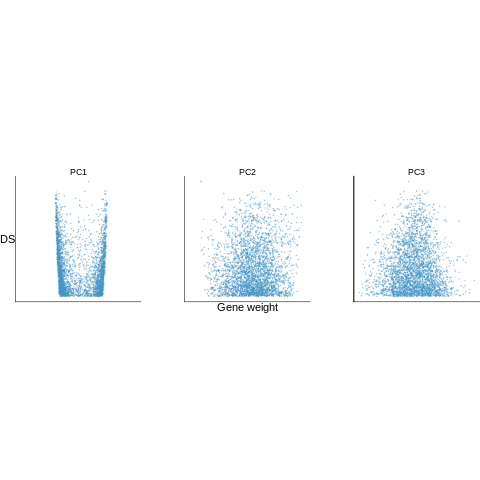

In [473]:
coefs_ds

In [523]:
%%R
# install.packages('ggtext')
library(ggtext)

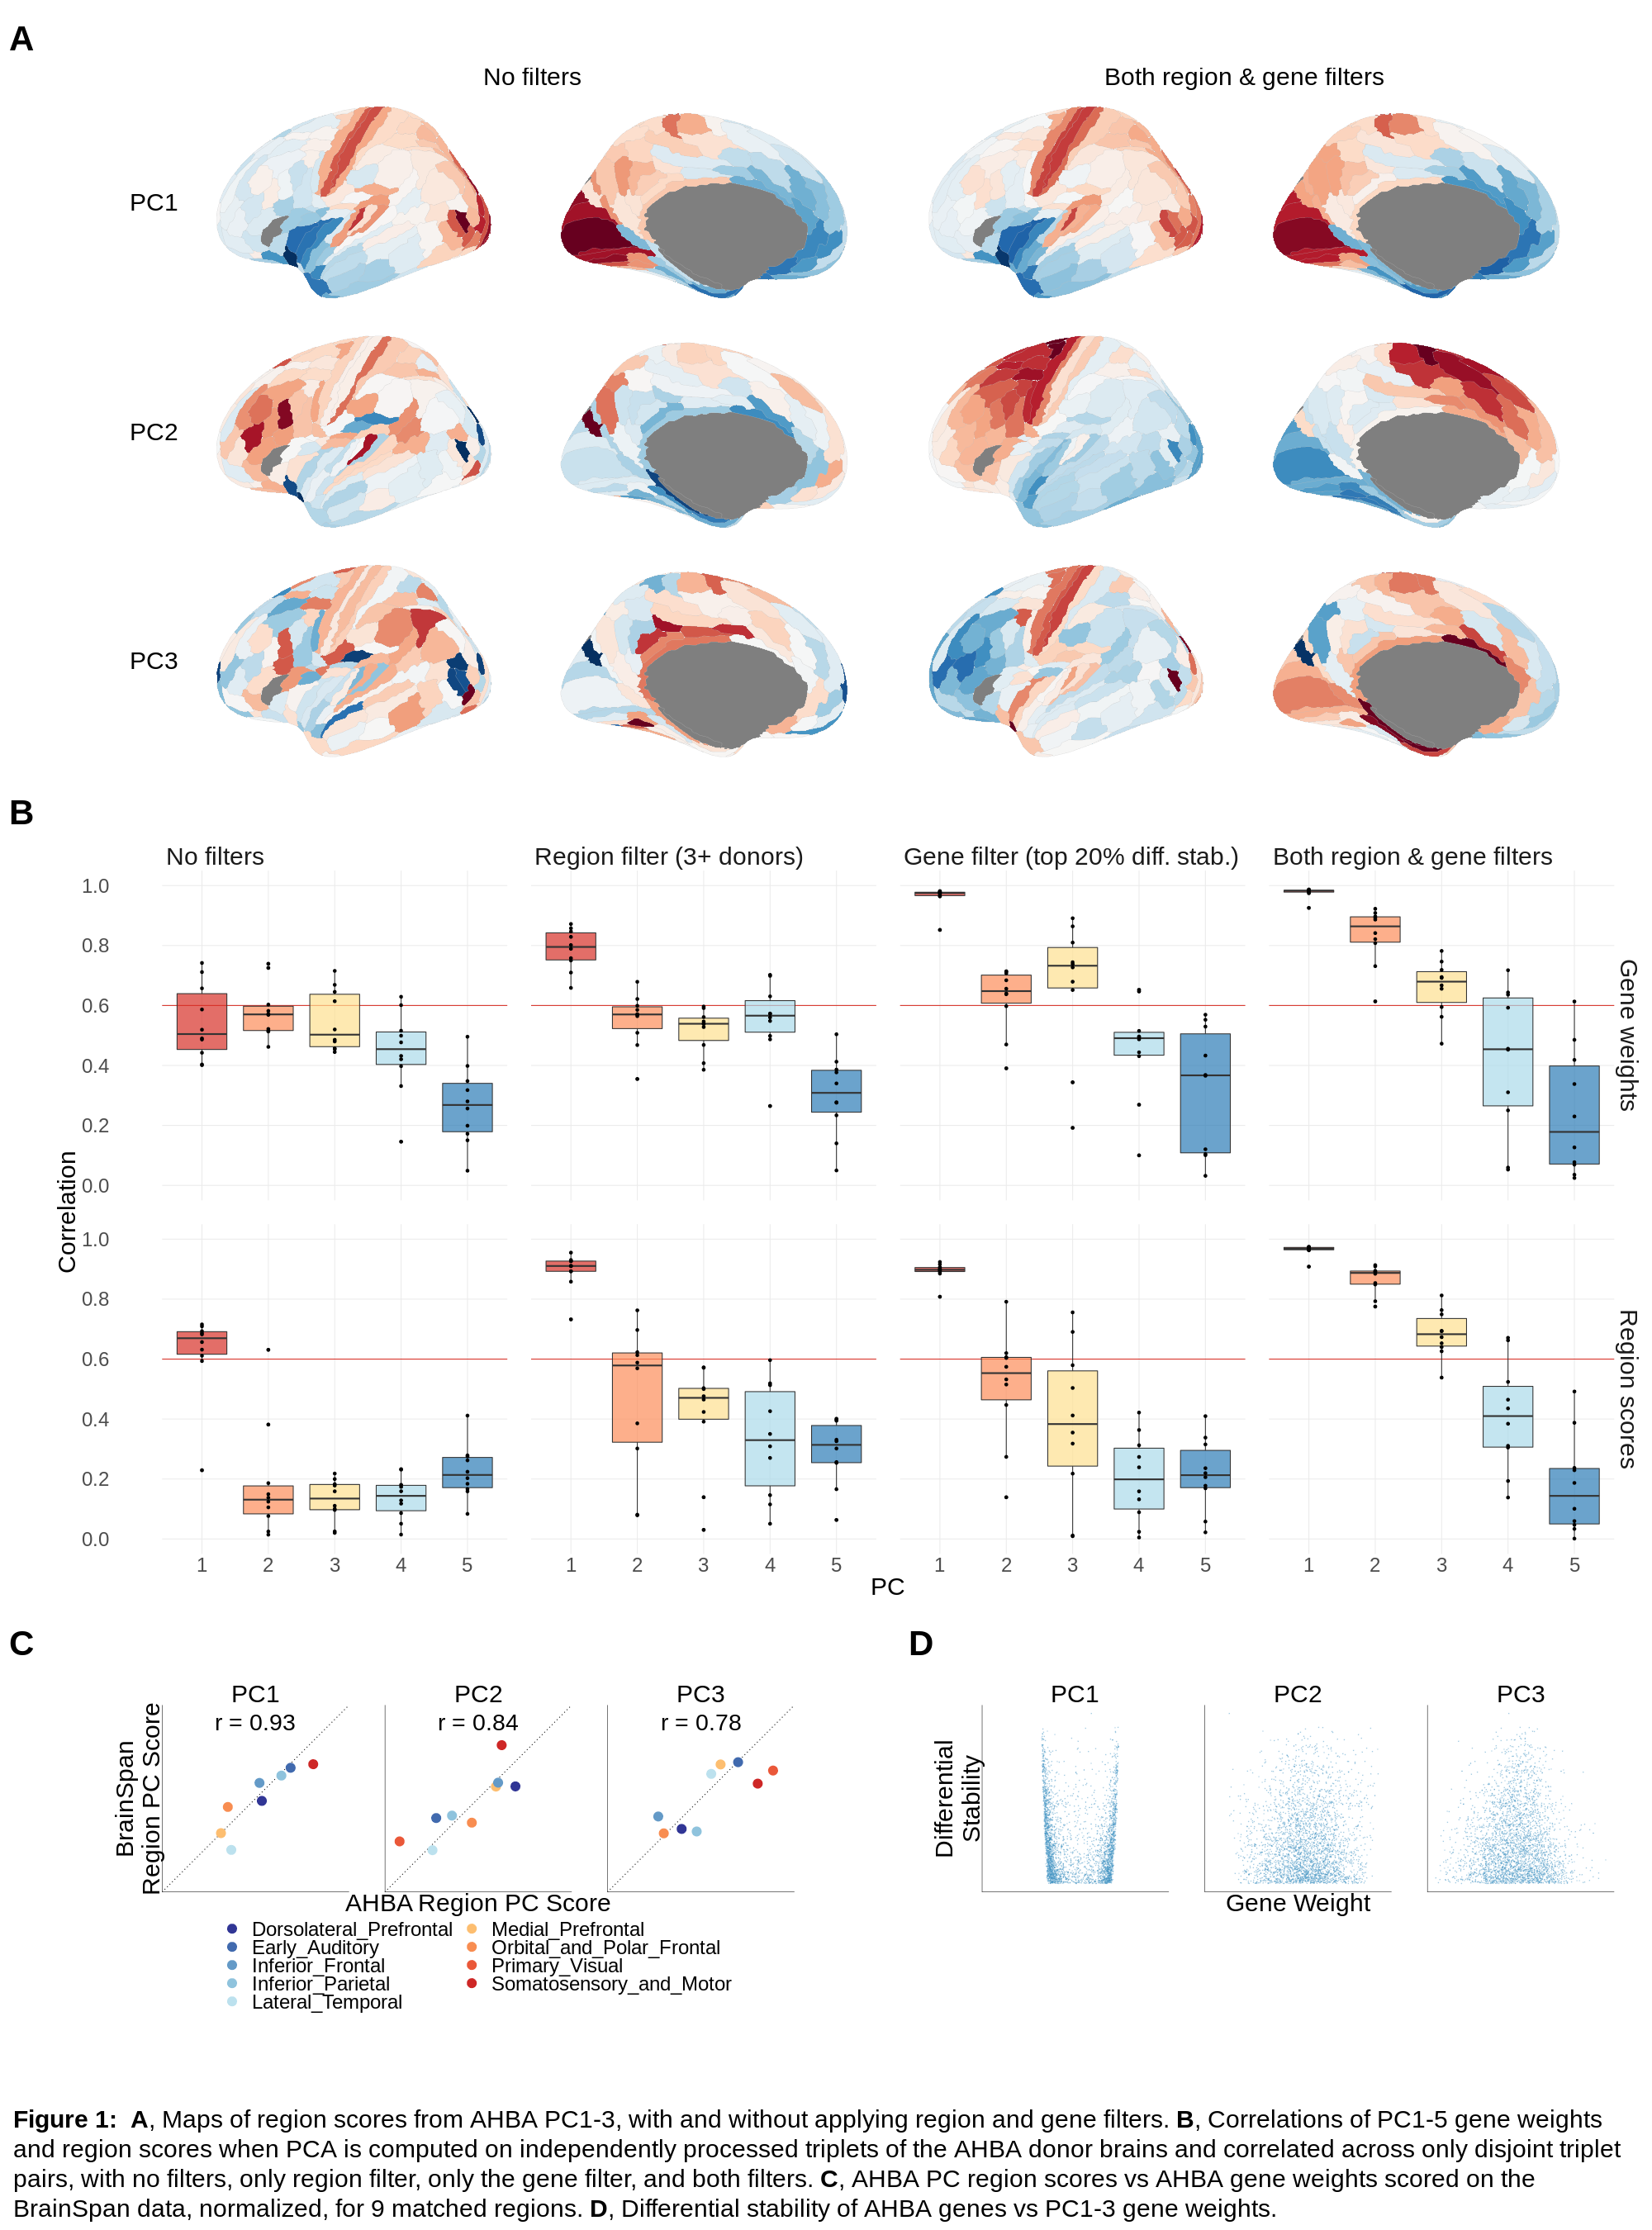

In [550]:
%%R -w 2000 -h 2700 -i triplet_versions -i ahba_scores -i bs_cortex -i bs_corrs -i coefs_ds
source("../code/Rplots.R")
source("../code/brainspan.R")
g1 <- plot_hcp(ahba_scores, three=T, switch='y') + guides(fill='none')
        # ggtitle("A | PC1-3 of AHBA with/without filtering") 
    
g2 <- plot_triplets(triplet_versions) + ylab('Correlation') 
        # ggtitle("B | Correlation of AHBA PC weights & scores between pairs of disjoint triplets")
    
g3 <- plot_bs_scatter_for_ohbm(bs_cortex, bs_corrs)  
        # ggtitle("C | PC scores in Brainspan vs AHBA")
    
g4 <- plot_coefs_ds(coefs_ds)
        # ggtitle("D | Gene Differential Stability vs PC Weight")

caption <- paste("**Figure 1:**",
                "**A**, Maps of region scores from AHBA PC1-3, with and without applying region and gene filters.",
                "**B**, Correlations of PC1-5 gene weights and region scores when PCA is computed on independently processed triplets of the AHBA donor brains and correlated across only disjoint triplet pairs, with no filters, only region filter, only the gene filter, and both filters.",
                "**C**, AHBA PC region scores vs AHBA gene weights scored on the BrainSpan data, normalized, for 9 matched regions.",
                "**D**, Differential stability of AHBA genes vs PC1-3 gene weights.")

(
(
    g1 / 
    g2 / 
    ((g3 | plot_spacer() | g4) + plot_layout(widths=c(6,1,6))) / 
    plot_spacer()
    # ((g1 | ) + plot_layout(widths=c(2,1))) / g3
) + plot_layout(heights=c(5,5,2,1)) & 
theme(text=element_text(size=30), strip.text=element_text(size=30),
      # plot.title=element_text(size=36, face='bold', hjust=0),
      # plot.caption = element_text(size = 12, hjust = 0, margin = margin(15,0,0,0)),
      plot.tag = element_text(size=42, face='bold', vjust=-2)
     )
) + plot_annotation(
  tag_level='A',
  caption = caption,
  theme = theme(plot.caption = element_textbox_simple(size = 30, padding = unit(c(5, 5, 5, 5), "pt"))))

## Fig 2

In [257]:
maps_jakob = (
    pd.read_csv("../data/stat_maps_HCP_forRichard.csv")
    .apply(lambda x: (x-np.mean(x))/np.std(x))
    .sort_index(axis=1)
    .set_index(get_labels_hcp()[:180])
    .rename_axis('region')#.reset_index()
)
maps_jakob

,CBF,G1_fMRI,PC1_AHBA,PC1_neurosynth,T1T2,allom,asl,curvature,externopyramidisation,geodist,...,glasser_CBV,glasser_CMRGlu,glasser_CMRO2,glasser_GI,hill.dev_remapped,hill.evo_remapped,thickness,x,y,z
region,,,,,,,,,,,,,,,,,,,,,
V1,-0.179597,-0.750526,-2.359875,0.261369,1.977036,-1.085134,-0.085518,1.555901,1.769126,-1.975811,...,2.293495,1.231160,2.873226,-1.523300,-0.275131,-2.446501,-2.310289,-1.255505,1.560962,-0.583163
MST,0.415531,-1.042511,-0.667729,-0.536989,1.575121,0.965346,0.263112,-0.905143,0.630473,-0.100868,...,-0.273515,0.017804,0.318382,-0.392062,0.246052,0.067569,-0.815568,0.738100,1.155091,-0.203728
V6,-0.433862,-1.135492,-1.890494,0.056781,1.647248,-0.020746,-0.355929,-0.366673,-1.006875,-1.563375,...,0.445668,0.515730,1.291453,-0.755553,-0.610757,-1.870358,-1.721457,-0.966524,1.438821,0.519752
V2,-0.156811,-0.933047,-2.073466,0.056781,1.665496,-1.157744,-0.267413,1.427644,1.377546,-1.930489,...,2.718926,0.871595,2.060033,-1.113092,-0.614974,-2.070317,-2.030079,-1.142430,1.510433,-0.497031
V3,-0.268078,-0.953694,-1.969166,0.056781,1.430449,-0.624528,-0.302699,1.207608,1.888340,-1.902737,...,1.801476,0.480104,0.991689,-0.421922,-0.479010,-1.813154,-1.497054,-0.879968,1.576216,-0.374542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STSva,-0.064344,1.434124,0.899926,1.234535,-0.795757,0.609727,0.071231,-1.014288,1.400205,0.778556,...,-0.442127,-1.356592,-1.549051,-0.482769,1.170922,1.189967,0.205376,1.176556,-0.238875,-1.290717
TE1m,1.361941,1.611986,0.713989,0.056781,-0.634758,0.906969,0.899422,1.246423,-0.677230,0.405919,...,-0.185135,-0.469423,-1.006154,0.461361,1.626480,1.581797,1.084687,1.884027,0.182489,-1.208325
PI,-0.387085,-0.607650,1.448596,0.056781,-1.391843,0.118060,-0.586942,-3.391453,-1.012710,0.297004,...,2.077343,-2.885445,-2.744273,-1.762716,-2.009474,-0.268852,-0.240927,0.744796,-0.359852,-1.148027


In [286]:
receptors = pd.read_csv("/home/rajd2/repos/hansen_receptors/results/receptor_data_HCP.csv",
            names=np.load("/home/rajd2/repos/hansen_receptors/data/receptor_names_pet.npy"))
receptors = (receptors
             .apply(lambda x: (x-np.mean(x))/np.std(x))
             .iloc[:180]
             .set_index(get_labels_hcp()[:180])
             .rename_axis('region')
            )
receptors

,5HT1a,5HT1b,5HT2a,5HT4,5HT6,5HTT,A4B2,CB1,D1,D2,DAT,GABAa,H3,M1,mGluR5,MOR,NET,VAChT
region,,,,,,,,,,,,,,,,,,
V1,-1.414510,1.450233,1.111638,-0.672842,-0.303861,0.895238,-1.732372,-2.072586,-0.160050,-1.522845,0.091763,1.939627,-0.847127,-0.074642,-1.272163,-2.352429,-0.556239,-0.648532
MST,0.870500,-0.142303,0.442070,0.301604,0.656809,0.022836,-0.217474,-1.251993,0.458186,-0.216739,0.467935,1.417069,-1.163996,-0.589638,0.069882,-0.409893,-0.240371,0.064093
V6,-0.962438,-0.576396,-0.830749,-1.014691,-0.255968,-0.324974,-0.813966,-1.378966,-0.943974,-0.922515,-0.270099,0.806548,-1.075138,-0.393576,-0.779450,-1.856863,0.132567,-0.556904
V2,-1.045505,0.049809,0.029207,-0.733458,-0.631466,0.343933,-1.394865,-1.579282,-0.125393,-1.276475,-0.273101,1.589787,-0.883429,-0.606742,-1.094340,-2.174631,-0.479210,-0.695328
V3,-1.205512,-0.817775,0.080203,-0.378302,-0.959303,0.080460,-1.335446,-1.020275,-0.633683,-1.086609,-0.654193,0.831474,-1.118177,-1.014196,-1.374135,-2.075176,-0.487914,-0.874071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STSva,1.969873,-0.248860,0.038667,0.463046,1.263807,-0.485272,-0.728339,0.398656,1.197161,1.650796,0.647658,1.410487,-0.902450,0.231727,0.087577,1.013739,-0.241088,0.171735
TE1m,-0.017526,-0.537233,1.893677,2.044506,1.171005,-0.247097,0.017966,0.910780,-0.545070,1.815393,-0.619723,-0.548044,-0.464565,0.917554,-0.304355,-0.098286,-0.122655,-1.483224
PI,1.814871,-1.234613,-2.297051,-1.792550,0.518010,-0.299031,-1.012855,1.091469,0.747127,1.735037,0.934525,1.152203,-0.071868,-0.359560,-0.789310,0.774699,-0.493145,0.424012


In [258]:
def get_corrs(version, maps):
    corrs = (
        hcp_base.score_from(version).iloc[:,:3]
        .join(get_labels_hcp()[:180]).set_index('label')
        .join(maps) #.set_index('region'))
        .corr().iloc[3:,:3]
        .set_axis([f'PC{i+1}' for i in range(3)], axis=1)
    )
    return corrs

In [259]:
version = hcp_3donors_ds8
scores = hcp_base.score_from(version).drop([3,4],axis=1).apply(lambda x: (x-np.mean(x))/np.std(x)).join(get_labels_hcp())

corrs = get_corrs(version, maps_jakob)

In [382]:
selected_maps = {
    #PC1
    'thickness':'Thickness',
    'T1T2':'Myelination (T1w/T2w ratio)',
    'glasser_CMRO2':'Oxygen Metabolic Rate (CMRO2)',
    #PC2
    'hill.dev_remapped':'Developmental Expansion',
    'externopyramidisation':'Intracortical Connectivity Distance',
    'glasser_GI':'Glycolytic Index (CMRO2/CMRGlu)',
    #PC3
    'allom':'Size Variation (allometric scaling)',
    'CBF':'Cerebral Blood Flow',
    'glasser_CMRGlu':'Glucose Metabolic Rate (CMRGlu)'
}

maps_to_plot = (maps_jakob
        .loc[:, selected_maps.keys()]
        .set_axis(selected_maps.values(), axis=1)
       )

map_corrs_sig = (pd.read_csv("../outputs/map_corrs_sig.csv", index_col=0)
        .loc[list(selected_maps.keys())+['x','y','z']]
        .set_axis(list(selected_maps.values())+['Lateral-Medial Axis','Rostral-Caudal Axis','Dorsal-Ventral Axis'], axis=0)
                )
map_corrs_sig

,PC1,PC2,PC3
Thickness,-0.68 ***,0.12,-0.03
Myelination (T1w/T2w ratio),0.76 ***,-0.13,0.25 *
Oxygen Metabolic Rate (CMRO2),0.68 ***,0.13,-0.19
Developmental Expansion,-0.08,0.43 **,-0.09
Intracortical Connectivity Distance,0.15,-0.56,0.1
Glycolytic Index (CMRO2/CMRGlu),0.18,0.57 *,-0.4 **
Size Variation (allometric scaling),0.21,0.13,-0.26 *
Cerebral Blood Flow,0.21,0.22,-0.36 *
Glucose Metabolic Rate (CMRGlu),0.58 *,0.4,-0.35 **
Lateral-Medial Axis,0.04,-0.14,-0.18


In [325]:
selected_receptors = {
    #PC1
    'MOR':'Opiod Receptor MOR',
    '5HT1a':'Serotonin Receptor 5HT1A',
    'CB1':'Cannbinoid Receptor CB1',
    'D1':'Dopamine Receptor D1',
    #PC2
    '5HT1b':'Serotonin Receptor 5HT1B',
    # '5HT4':'Serotonin Receptor 5HT4',
    'A4B2':'Acetylcholine Receptor A4B2',
    'H3':'Histamine Receptor H3',
    'D2':'Dopamine Receptor D2',
    #PC3
    '5HTT':'Serotonin Transporter 5HTT',
    'VAChT':'Acetylcholine Transporter VAChT',
    'M1':'Acetylcholine Receptor M1',
    'DAT':'Dopamine Transporter DAT',
}

receptors_to_plot = (receptors
        .loc[:, selected_receptors.keys()]
        .set_axis(selected_receptors.values(), axis=1)
       )

receptor_corrs_sig = (pd.read_csv("../outputs/receptor_corrs_sig.csv", index_col=0)
        .loc[selected_receptors.keys()]
        .set_axis(selected_receptors.values(), axis=0)
                )
receptor_corrs_sig

,PC1,PC2,PC3
Opiod Receptor MOR,-0.71 **,0.28,-0.09
Serotonin Receptor 5HT1A,-0.57 *,-0.26,0.2
Cannbinoid Receptor CB1,-0.59 **,0.05,-0.21
Dopamine Receptor D1,-0.42,-0.2,0.11
Serotonin Receptor 5HT1B,0.07,0.41 *,-0.23
Acetylcholine Receptor A4B2,-0.06,0.52,-0.23
Histamine Receptor H3,-0.52 *,0.38,0.02
Dopamine Receptor D2,-0.64 **,-0.38,0.03
Serotonin Transporter 5HTT,-0.37,-0.24,0.38 **
Acetylcholine Transporter VAChT,-0.29,0.05,0.3 *


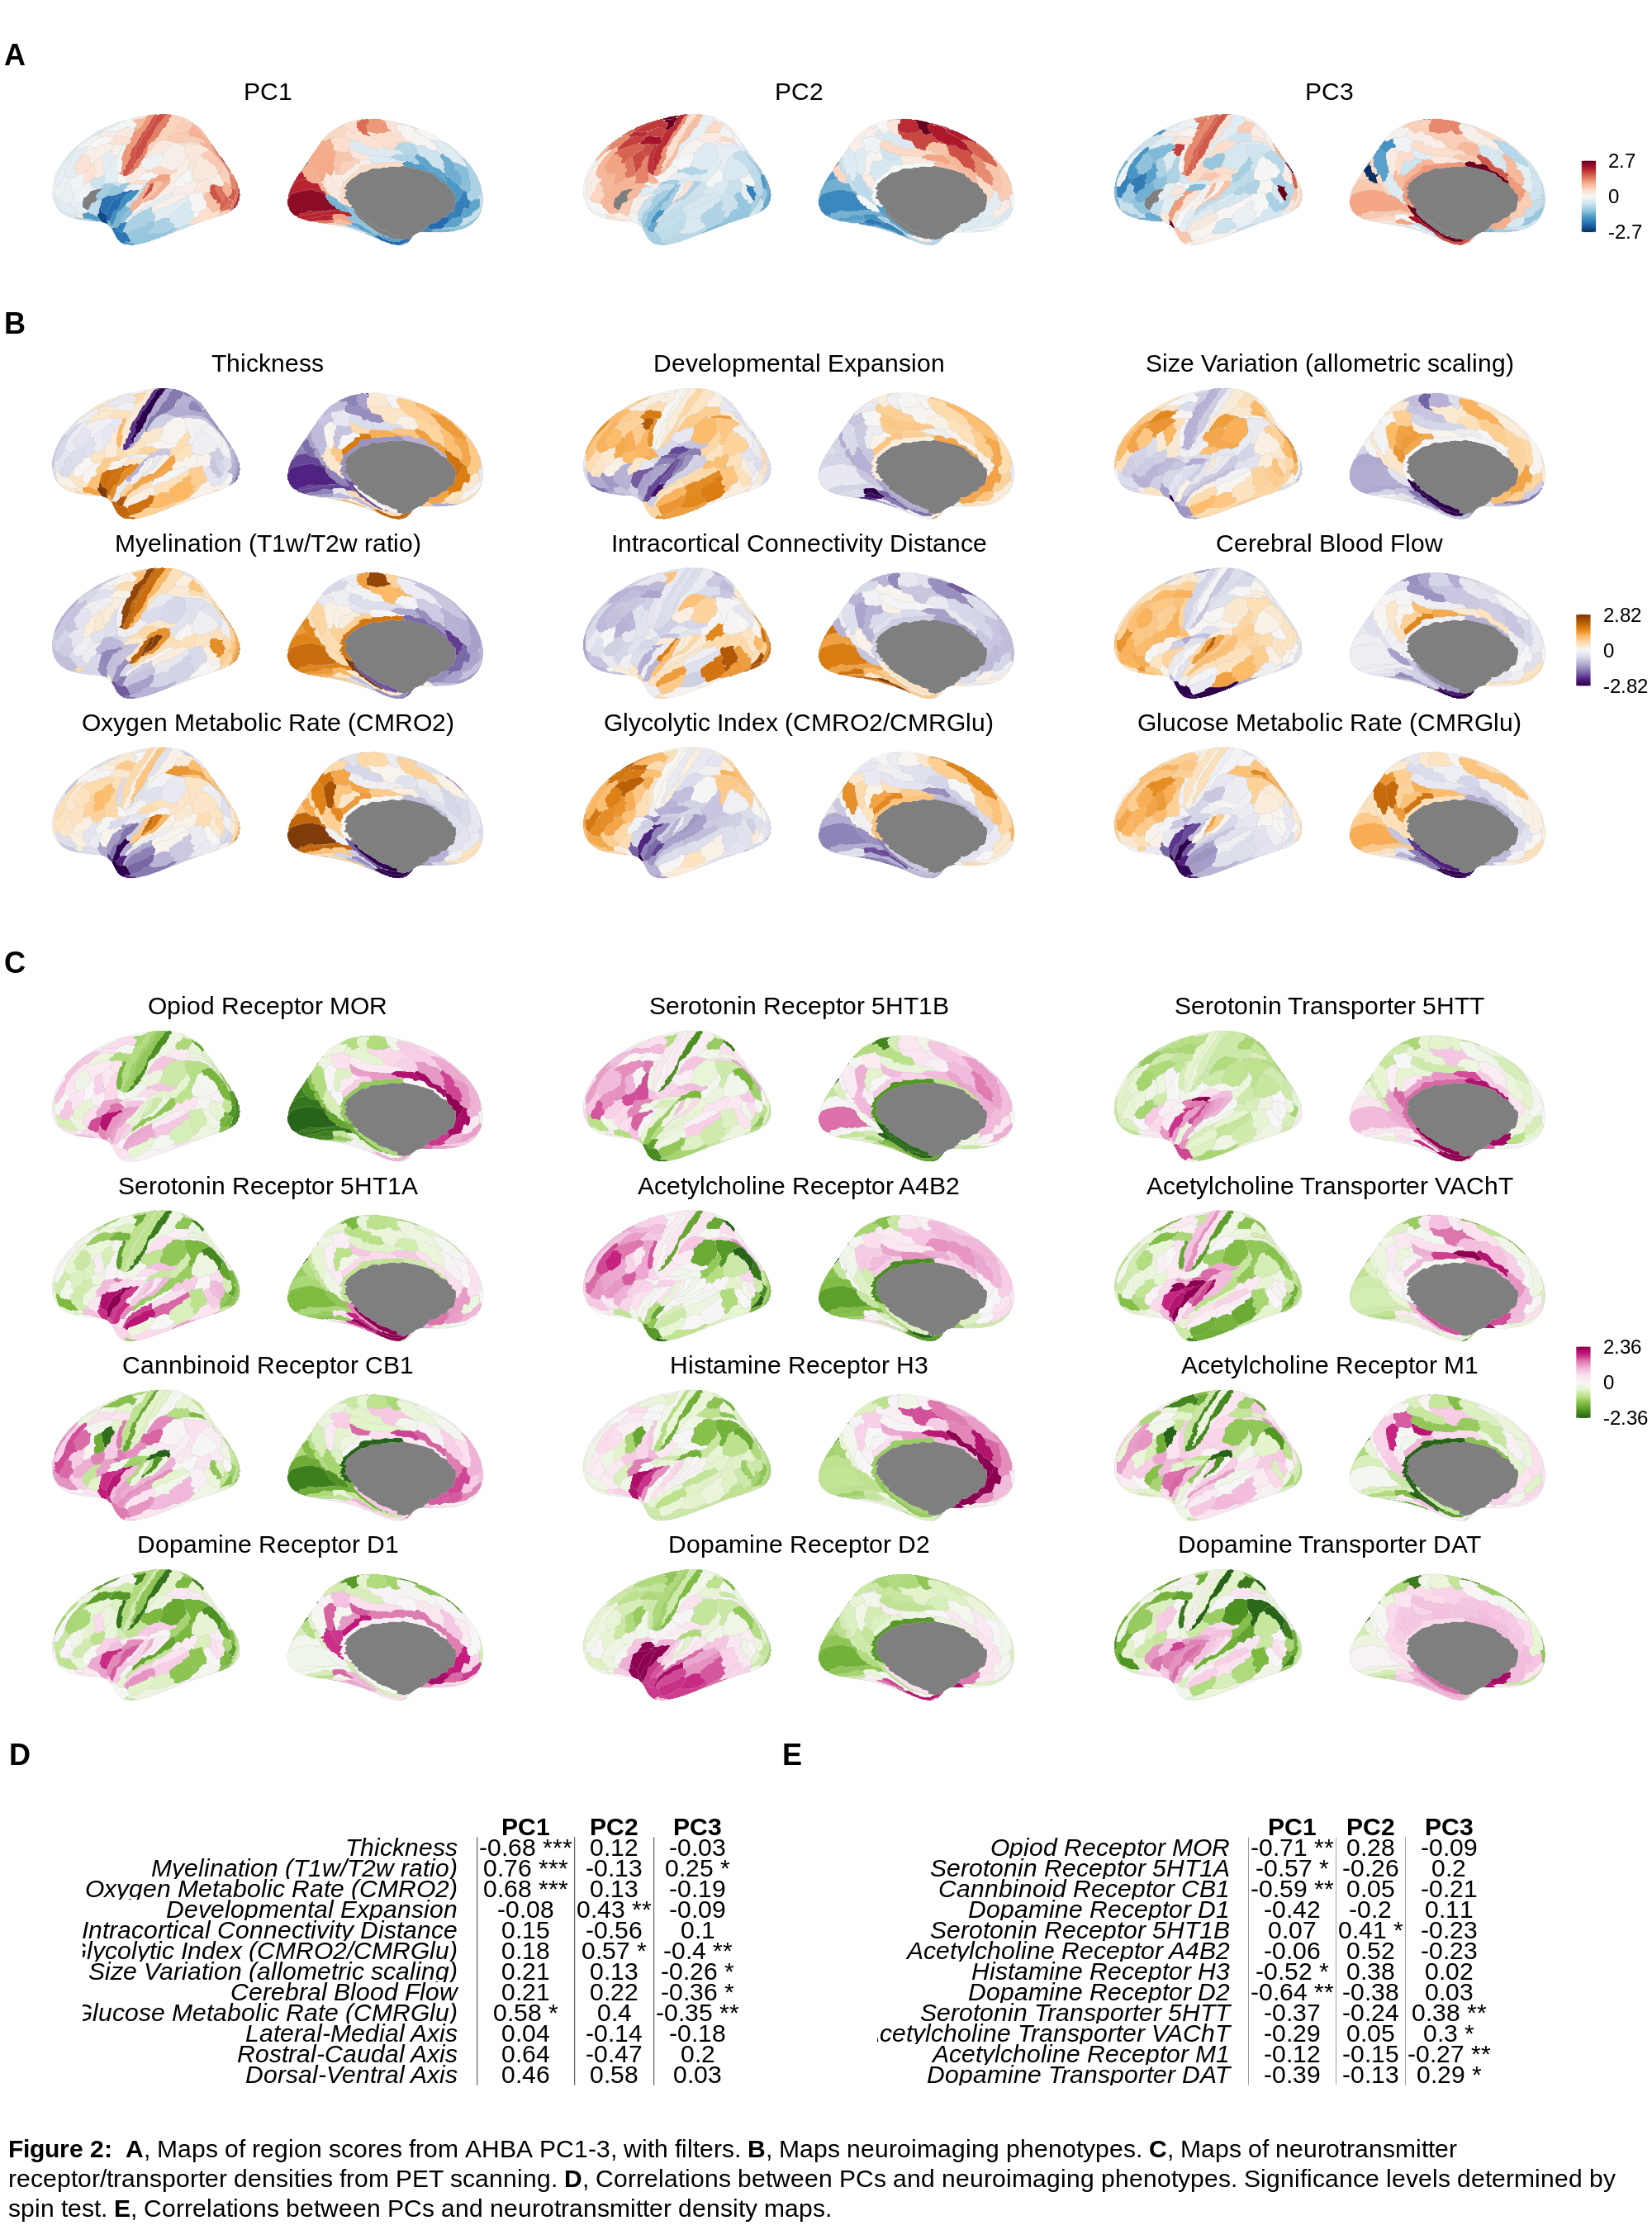

In [575]:
%%R -i maps_to_plot -i receptors_to_plot -i scores -i map_corrs_sig -i receptor_corrs_sig -w 2000 -h 2700
source("../code/plot_maps.R")
    
g0 <- plot_hcp_wide(scores) + theme(strip.text=element_text())
    # ggtitle("A | Gene Expression Gradients")

g1 <- plot_maps(maps_to_plot, colors=rev(brewer.puor(100)))
    # ggtitle("B | Anatomical & Metabolic Maps")

g2 <- plot_maps(receptors_to_plot, colors=rev(brewer.piyg(100)))
    # ggtitle("C | Neurotransmitter Receptor/Transporter Density Maps")
    
gt1 <- ggtexttable(map_corrs_sig, theme=ttheme('minimal', base_size=30, padding = unit(c(5, 5, 5, 5), "pt"))) +
    plot_layout(tag_level='new') + ggtitle("D")
gt2 <- ggtexttable(receptor_corrs_sig, theme=ttheme('minimal', base_size=30, padding = unit(c(5, 5, 5, 5), "pt"))) + 
    plot_layout(tag_level='new') + ggtitle("E")
    # annotate('text', label=expression(paste(" * = ", p[spin]<0.05,
    #                          ",   ** = ", p[spin]<0.01,
    #                          ",   *** = ", p[spin]<0.001)),
    #          x=0.15,y=0.05, size=10, hjust=0
    #         )

caption <- paste("**Figure 2:**",
                "**A**, Maps of region scores from AHBA PC1-3, with filters.",
                "**B**, Maps neuroimaging phenotypes.",
                "**C**, Maps of neurotransmitter receptor/transporter densities from PET scanning.",
                "**D**, Correlations between PCs and neuroimaging phenotypes. Significance levels determined by spin test.",
                "**E**, Correlations between PCs and neurotransmitter density maps."
                )

(
(
    (g0 / g1 / g2 / (gt1 | gt2))
) + plot_layout(heights=c(1,3,4,2)) & 
    theme(plot.title = element_text(size = 36, hjust=-.022, vjust=-.05, face='bold'),
          plot.tag = element_text(size=36, face='bold', vjust=-5),
          text=element_text(size=30), strip.text.x=element_text(size=30), legend.position='right')
) + plot_annotation(
  tag_level='A',
  caption = caption,
  theme = theme(plot.caption = element_textbox_simple(size = 30, padding = unit(c(5, 5, 5, 5), "pt"))))